In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from statistics import mean

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\Sai'

In [5]:
os.chdir('G:\\downloads')

In [6]:
os.getcwd()

'G:\\downloads'

In [7]:
data=pd.read_csv('G:\\downloads\\train.csv')

In [8]:
data.head()

,f_h,s_h
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


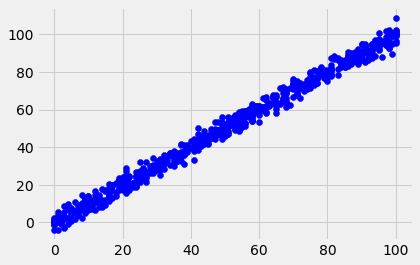

In [9]:
data.fillna(50,inplace=True)
plt.scatter(data.f_h,data.s_h,color='blue')
plt.show()

In [10]:
#HERE WE ARE DEFINING THE FUNCTION
def best_fit_slope(xs,ys):
    m=( ((mean(xs)*mean(ys))-mean(xs*ys)) / ((mean(xs)**2)- (mean(xs**2))) )
    return m

In [11]:
m=best_fit_slope(data.f_h,data.s_h)

In [12]:
m

1.0002788139118575

In [13]:
#intercept
def intercept(xs,ys):
    b=np.mean(ys)-(m*np.mean(xs))
    return b

In [14]:
b=intercept(data.f_h,data.s_h)

In [15]:
b

-0.088275321291646947

In [16]:
regression_line=[m*x+b for x in data.f_h]

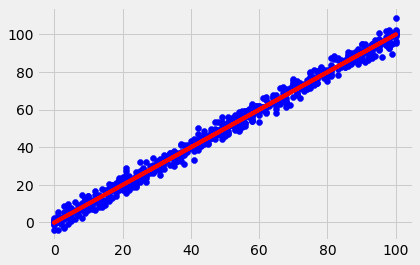

In [17]:
plt.scatter(data.f_h,data.s_h,color='blue')
plt.plot(data.f_h,regression_line,color='red')
plt.show()

In [18]:
#testing
test=pd.read_csv('G:\\downloads\\test.csv')

In [19]:
test.head()

,f_h,s_h
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [20]:
predict_x=test.f_h

In [21]:
predict_y=[(m*x)+b for x in (predict_x)]

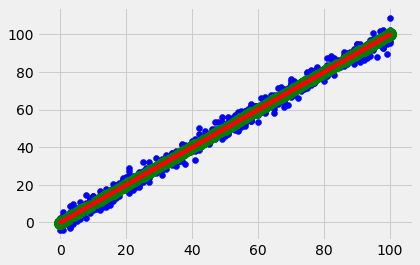

In [22]:
#passing the test data
plt.scatter(data.f_h,data.s_h,color='blue')
plt.plot(data.f_h,regression_line,color='red')
plt.scatter(predict_x,predict_y,color='green',s=150)
plt.show()

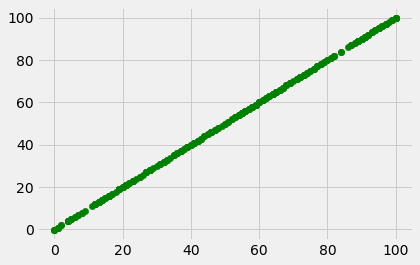

In [23]:
#above it is not clearly visible so plottings seperately
plt.scatter(predict_x,predict_y,color='green',s=40)
plt.show()

In [24]:
#single prediction
predict_x1=79
predict_y1=[(m*predict_x1)+b]

In [25]:
predict_y1

[78.933750977745092]

In [26]:
#testing accuracy
def squarred_error(xs,ys):
    return sum((xs-ys)**2)

In [27]:
def coefficient_of_determination(xs,ys):
    mean_line=[np.mean(xs)]
    squarred_regerror=squarred_error(xs,ys)
    squarred_meanerror=squarred_error(xs,mean_line)
    return 1-(squarred_regerror/squarred_meanerror)

In [28]:
r_squared=coefficient_of_determination(data.s_h,regression_line)

In [29]:
r_squared

0.99070138155662768